In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

data = pd.read_csv("/content/Instagram data.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

**Check Nulls**

In [3]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [4]:
data = data.dropna()

**Get information about columns**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


**Now plot columns distribution**

<ipython-input-6-56b9aea354db>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


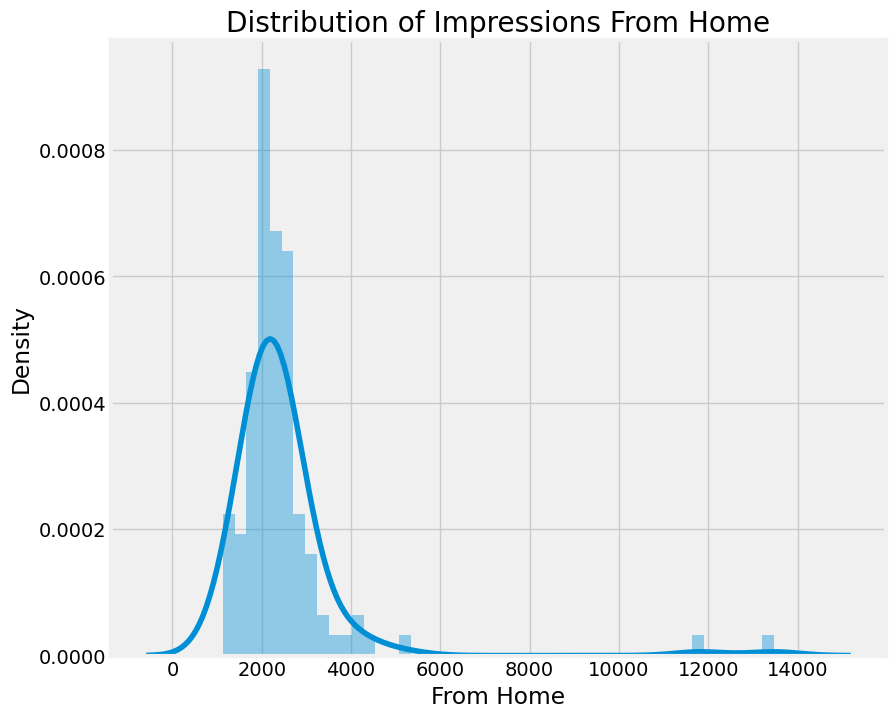

In [6]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

<ipython-input-7-8c45b7b41edc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


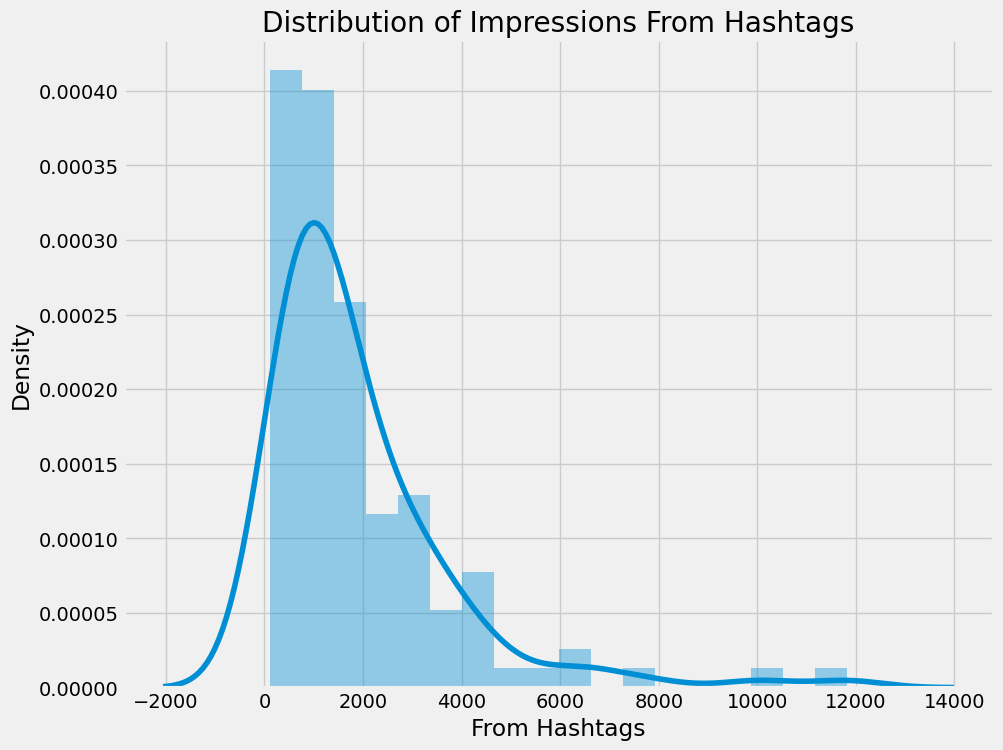

In [7]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

<ipython-input-8-3461ec84008d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


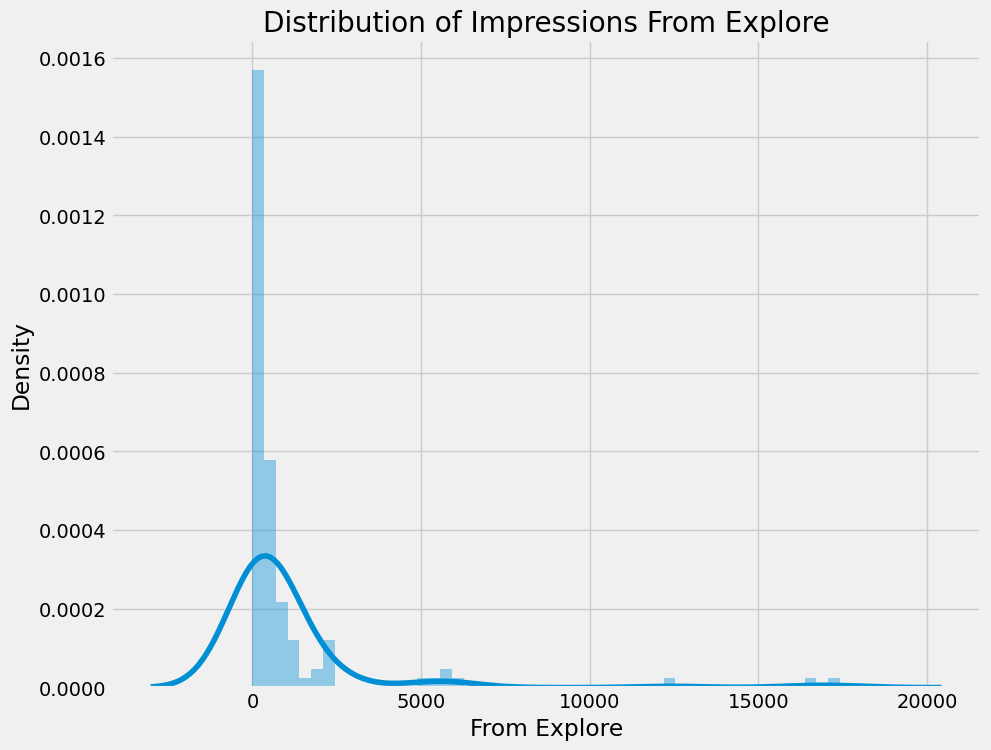

In [8]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

**Look at the percentage of impressions I get from various sources on Instagram**

In [9]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels,
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

<ipython-input-13-6cb10d4c4e1f>:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




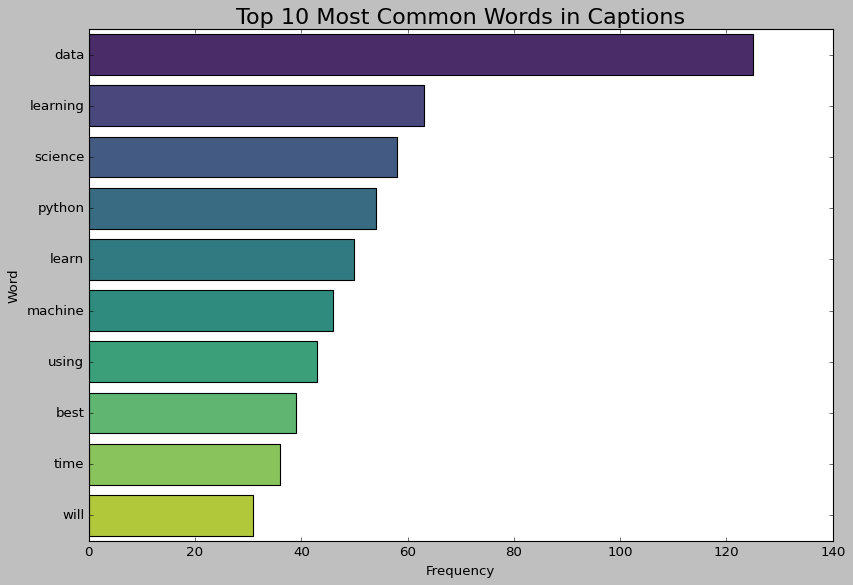

In [13]:
text = " ".join(i for i in data['Caption'])
# Define stopwords
stopwords = set(STOPWORDS)

# Function to clean and tokenize text
def clean_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize by splitting by whitespace
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stopwords]
    return words

# Clean and tokenize the text
words = clean_text(text)

# Count word frequencies
word_freq = Counter(words)

# Get the most common words
most_common_words = word_freq.most_common(10)  # Change the number to show more/less words

# Create a DataFrame for plotting
import pandas as pd
word_freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')
plt.title('Top 10 Most Common Words in Captions', fontsize=20)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

**Wordcloud of the hashtags column to look at the most used hashtags in my Instagram posts**

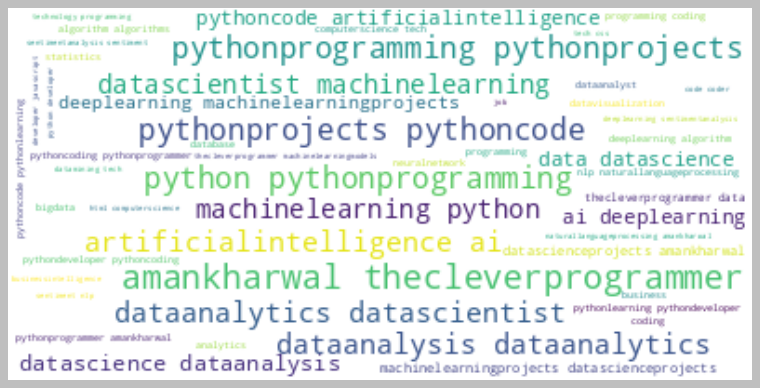

In [14]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**The relationship between the number of likes and the number of impressions on my Instagram posts**

In [15]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols",
                    title = "Relationship Between Likes and Impressions",trendline_color_override = "red")
figure.show()

**The relationship between the number of comments and the number of impressions on my Instagram posts**

In [17]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols",
                    title = "Relationship Between Comments and Total Impressions",trendline_color_override="red")
figure.show()

**The relationship between the number of shares and the number of impressions**

In [20]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols",
                    title = "Relationship Between Shares and Total Impressions",trendline_color_override="red")
figure.show()

**A more number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do. Now let’s have a look at the relationship between the number of saves and the number of impressions**

In [21]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols",
                    title = "Relationship Between Post Saves and Total Impressions",trendline_color_override="red")
figure.show()

**Look at the correlation of all the columns with the Impressions column**

In [24]:
# Convert all columns to numeric, non-convertible values will be turned to NaN
data_numeric = data.apply(pd.to_numeric, errors='coerce')

# Drop columns with all NaN values (which were non-numeric columns)
data_numeric = data_numeric.dropna(axis=1, how='all')

# Calculate the correlation matrix
correlation = data_numeric.corr()

# Print the correlation values for 'Impressions'
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


 **To calculate conversion rate is (Follows/Profile Visits) * 100. Now let’s have a look at the conversation rate of my Instagram account:**

In [25]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


**Make Regression model to predict reach**

In [34]:
from sklearn.svm import SVR

x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares',
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)
model = SVR(kernel="linear")
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8995208537658589